#Libraries

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from google.colab import drive
import plotly.express as px
import plotly.graph_objs as go
from pylab import rcParams
from plotly.subplots import make_subplots
import math as m
import statistics as stat
import seaborn as sns 
from scipy.stats import sem
from scipy.stats import shapiro
from statsmodels.tsa.seasonal import DecomposeResult, seasonal_decompose

# Data Aggregation

In [44]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
dir='/content/drive/MyDrive/Graduation Project/Reema/Datasets/UC10/' #Changed Manually
df=[]
for file in os.listdir(dir):
  name=file
  dir_new = dir+"/"+name
  df_partial=pd.read_csv(dir_new)
  df.append(df_partial)
dsuc10=pd.concat(df)
dsuc10

measure_id                        measure_name  location_id  \
0                3  YLDs (Years Lived with Disability)           34   
1                3  YLDs (Years Lived with Disability)           34   
2                3  YLDs (Years Lived with Disability)           34   
3                3  YLDs (Years Lived with Disability)           34   
4                3  YLDs (Years Lived with Disability)           34   
...            ...                                 ...          ...   
499995           3  YLDs (Years Lived with Disability)           34   
499996           3  YLDs (Years Lived with Disability)           34   
499997           3  YLDs (Years Lived with Disability)           34   
499998           3  YLDs (Years Lived with Disability)           34   
499999           3  YLDs (Years Lived with Disability)           34   

       location_name  sex_id sex_name  age_id          age_name  cause_id  \
0         Azerbaijan       1     Male      22          All ages       429   
1         Azerbaijan       2   Female      22          All ages       429   
2         Azerbaijan       3     Both      22          All ages       429   
3         Azerbaijan       1     Male      22          All ages       429   
4         Azerbaijan       2   Female      22          All ages       429   
...              ...     ...      ...     ...               ...       ...   
499995    Azerbaijan       2   Female      27  Age-standardized       426   
499996    Azerbaijan       3     Both      27  Age-standardized       426   
499997    Azerbaijan       1     Male      27  Age-standardized       426   
499998    Azerbaijan       2   Female      27  Age-standardized       426   
499999    Azerbaijan       3     Both      27  Age-standardized       426   

                                 cause_name  metric_id metric_name  year  \
0                             Breast cancer          1      Number  2008   
1                             Breast cancer          1      Number  2008   
2                             Breast cancer          1      Number  2008   
3                             Breast cancer          2     Percent  2008   
4                             Breast cancer          2     Percent  2008   
...                                     ...        ...         ...   ...   
499995  Tracheal, bronchus, and lung cancer          2     Percent  2008   
499996  Tracheal, bronchus, and lung cancer          2     Percent  2008   
499997  Tracheal, bronchus, and lung cancer          3        Rate  2008   
499998  Tracheal, bronchus, and lung cancer          3        Rate  2008   
499999  Tracheal, bronchus, and lung cancer          3        Rate  2008   

                val        upper       lower  
0          8.252234    11.866092    5.102829  
1        997.365223  1376.672985  686.430373  
2       1005.617456  1386.075413  692.525527  
3          0.000023     0.000030    0.000017  
4          0.002129     0.002547    0.001745  
...             ...          ...         ...  
499995     0.000187     0.000249    0.000138  
499996     0.000545     0.000703    0.000409  
499997     9.110959    12.462407    6.073185  
499998     1.940288     2.699310    1.304967  
499999     5.196595     6.880450    3.533933  

[3333300 rows x 16 columns]

# Data Exploration



In [46]:
dsuc10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3333300 entries, 0 to 499999
Data columns (total 16 columns):
 #   Column         Dtype  
---  ------         -----  
 0   measure_id     int64  
 1   measure_name   object 
 2   location_id    int64  
 3   location_name  object 
 4   sex_id         int64  
 5   sex_name       object 
 6   age_id         int64  
 7   age_name       object 
 8   cause_id       int64  
 9   cause_name     object 
 10  metric_id      int64  
 11  metric_name    object 
 12  year           int64  
 13  val            float64
 14  upper          float64
 15  lower          float64
dtypes: float64(3), int64(7), object(6)
memory usage: 432.3+ MB


In [47]:
dsuc10['location_name'].unique()

array(['Azerbaijan', 'South Asia', 'Mali', 'Botswana', 'Belize',
       'Afghanistan', 'Sierra Leone', 'Mongolia', 'Thailand', 'Niger',
       'Cambodia', 'Cuba', 'Saint Kitts and Nevis', 'Canada',
       'African Union', 'Asia', 'Jordan', 'Ireland', 'Nicaragua',
       'Burundi', 'Kiribati', 'Rwanda', 'Syrian Arab Republic',
       'High SDI', 'Yemen', 'New Zealand', 'Belarus',
       'Micronesia (Federated States of)', 'Low-middle SDI', 'Oman',
       'Palestine', 'Mauritius', 'Albania', 'Republic of Korea',
       'Southeast Asia, East Asia, and Oceania', 'Russian Federation',
       'Croatia', 'Namibia', 'North Africa and Middle East', 'Dominica',
       'Equatorial Guinea', 'High-income North America', 'Norway',
       'WHO region', 'Southeast Asia', 'Southern Latin America',
       'Uzbekistan', 'Colombia', 'Guinea-Bissau', 'Bangladesh', 'Oceania',
       'Congo', 'Bahamas', 'Sao Tome and Principe', 'Zimbabwe', 'Somalia',
       'Sweden', 'Austria', 'Lesotho', 'Slovakia', 'Poland

In [48]:
dsuc10['cause_name'].nunique()

30

# Data Cleaning 

In [49]:
def apply_filter(df,age,metric):
  df_filtered=df[(df['sex_name']=='Both') & (df['age_name']==age) & (df['metric_name']==metric)]
  df_filtered.drop(['measure_id','measure_name','location_id','sex_id','age_id','sex_name','age_name','cause_id','metric_id'],axis=1,inplace=True)
  return df_filtered

In [50]:
#dsuc10['year'] = pd.to_datetime(dsuc10['year'], format='%Y')
#dsuc10.info()
#dsuc10.sort_index(inplace=True)

In [51]:
copy=dsuc10.copy()
copy

measure_id                        measure_name  location_id  \
0                3  YLDs (Years Lived with Disability)           34   
1                3  YLDs (Years Lived with Disability)           34   
2                3  YLDs (Years Lived with Disability)           34   
3                3  YLDs (Years Lived with Disability)           34   
4                3  YLDs (Years Lived with Disability)           34   
...            ...                                 ...          ...   
499995           3  YLDs (Years Lived with Disability)           34   
499996           3  YLDs (Years Lived with Disability)           34   
499997           3  YLDs (Years Lived with Disability)           34   
499998           3  YLDs (Years Lived with Disability)           34   
499999           3  YLDs (Years Lived with Disability)           34   

       location_name  sex_id sex_name  age_id          age_name  cause_id  \
0         Azerbaijan       1     Male      22          All ages       429   
1         Azerbaijan       2   Female      22          All ages       429   
2         Azerbaijan       3     Both      22          All ages       429   
3         Azerbaijan       1     Male      22          All ages       429   
4         Azerbaijan       2   Female      22          All ages       429   
...              ...     ...      ...     ...               ...       ...   
499995    Azerbaijan       2   Female      27  Age-standardized       426   
499996    Azerbaijan       3     Both      27  Age-standardized       426   
499997    Azerbaijan       1     Male      27  Age-standardized       426   
499998    Azerbaijan       2   Female      27  Age-standardized       426   
499999    Azerbaijan       3     Both      27  Age-standardized       426   

                                 cause_name  metric_id metric_name  year  \
0                             Breast cancer          1      Number  2008   
1                             Breast cancer          1      Number  2008   
2                             Breast cancer          1      Number  2008   
3                             Breast cancer          2     Percent  2008   
4                             Breast cancer          2     Percent  2008   
...                                     ...        ...         ...   ...   
499995  Tracheal, bronchus, and lung cancer          2     Percent  2008   
499996  Tracheal, bronchus, and lung cancer          2     Percent  2008   
499997  Tracheal, bronchus, and lung cancer          3        Rate  2008   
499998  Tracheal, bronchus, and lung cancer          3        Rate  2008   
499999  Tracheal, bronchus, and lung cancer          3        Rate  2008   

                val        upper       lower  
0          8.252234    11.866092    5.102829  
1        997.365223  1376.672985  686.430373  
2       1005.617456  1386.075413  692.525527  
3          0.000023     0.000030    0.000017  
4          0.002129     0.002547    0.001745  
...             ...          ...         ...  
499995     0.000187     0.000249    0.000138  
499996     0.000545     0.000703    0.000409  
499997     9.110959    12.462407    6.073185  
499998     1.940288     2.699310    1.304967  
499999     5.196595     6.880450    3.533933  

[3333300 rows x 16 columns]

In [52]:
dsuc10_filter = apply_filter(copy,'All ages','Number')
dsuc10_filter

<ipython-input-49-77cd8f71e7e3>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



location_name                           cause_name metric_name  year  \
2         Azerbaijan                        Breast cancer      Number  2008   
16        Azerbaijan                      Cervical cancer      Number  2008   
27        South Asia                    Esophageal cancer      Number  2008   
42        South Asia                       Stomach cancer      Number  2008   
57        South Asia                         Liver cancer      Number  2008   
...              ...                                  ...         ...   ...   
499933          Oman                    Pancreatic cancer      Number  2008   
499942          Niue                    Pancreatic cancer      Number  2008   
499957          Niue              Malignant skin melanoma      Number  2008   
499972    Azerbaijan                        Larynx cancer      Number  2008   
499987    Azerbaijan  Tracheal, bronchus, and lung cancer      Number  2008   

                 val         upper         lower  
2        1005.617456   1386.075413    692.525527  
16        261.676677    373.803871    177.656491  
27      10636.421527  14847.206861   7371.423588  
42      19042.823116  24928.426507  13519.218792  
57       6208.816525   8391.264599   4302.619160  
...              ...           ...           ...  
499933     10.810924     14.533870      7.405324  
499942      0.024325      0.034750      0.015818  
499957      0.003338      0.005209      0.002131  
499972    113.056080    155.662903     76.485887  
499987    372.541254    497.237069    249.791109  

[229500 rows x 7 columns]

In [53]:
dsuc10_filter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229500 entries, 2 to 499987
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   location_name  229500 non-null  object 
 1   cause_name     229500 non-null  object 
 2   metric_name    229500 non-null  object 
 3   year           229500 non-null  int64  
 4   val            229500 non-null  float64
 5   upper          229500 non-null  float64
 6   lower          229500 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 14.0+ MB


In [54]:
arab=[ 'Algeria','Bahrain','Egypt','Iraq','Jordan','Kuwait','Lebanon','Libya','Morocco','Oman','Palestine','Qatar','Saudi Arabia','Somalia','South Sudan','Sudan','Syrian Arab Republic','Tunisia','United Arab Emirates','Yemen']
arab_df=dsuc10_filter[dsuc10_filter['location_name'].isin(arab)==True]
arab_df['location_name'].unique()

array(['Jordan', 'Syrian Arab Republic', 'Yemen', 'Oman', 'Palestine',
       'Somalia', 'Libya', 'Kuwait', 'Saudi Arabia', 'Bahrain', 'Lebanon',
       'Algeria', 'Tunisia', 'Morocco', 'Sudan', 'United Arab Emirates',
       'Iraq', 'Qatar', 'South Sudan', 'Egypt'], dtype=object)

In [55]:
arab_df

location_name                            cause_name metric_name  year  \
1196          Jordan                        Thyroid cancer      Number  2008   
1211          Jordan                          Mesothelioma      Number  2008   
1226          Jordan                      Hodgkin lymphoma      Number  2008   
1241          Jordan                  Non-Hodgkin lymphoma      Number  2008   
1256          Jordan                      Multiple myeloma      Number  2008   
...              ...                                   ...         ...   ...   
499216  Saudi Arabia                  Other pharynx cancer      Number  2007   
499888          Oman                    Nasopharynx cancer      Number  2008   
499903          Oman                  Other pharynx cancer      Number  2008   
499918          Oman  Gallbladder and biliary tract cancer      Number  2008   
499933          Oman                     Pancreatic cancer      Number  2008   

               val       upper      lower  
1196     74.072894  106.248114  46.375207  
1211      2.437006    3.415643   1.622120  
1226      7.778268   11.191598   4.899458  
1241    109.794433  150.511378  75.092057  
1256     19.269295   27.016233  12.740089  
...            ...         ...        ...  
499216   15.675219   21.518041  10.730668  
499888    7.136210    9.651402   5.052801  
499903    1.834484    2.407581   1.249795  
499918    3.546183    4.690894   2.428658  
499933   10.810924   14.533870   7.405324  

[18000 rows x 7 columns]

In [56]:
for i in arab_df.location_name.unique():
  print(f"Total Number of Years in {i}: ",arab_df[arab_df['location_name']==i]['year'].nunique(),'\n') 

Total Number of Years in Jordan:  30 

Total Number of Years in Syrian Arab Republic:  30 

Total Number of Years in Yemen:  30 

Total Number of Years in Oman:  30 

Total Number of Years in Palestine:  30 

Total Number of Years in Somalia:  30 

Total Number of Years in Libya:  30 

Total Number of Years in Kuwait:  30 

Total Number of Years in Saudi Arabia:  30 

Total Number of Years in Bahrain:  30 

Total Number of Years in Lebanon:  30 

Total Number of Years in Algeria:  30 

Total Number of Years in Tunisia:  30 

Total Number of Years in Morocco:  30 

Total Number of Years in Sudan:  30 

Total Number of Years in United Arab Emirates:  30 

Total Number of Years in Iraq:  30 

Total Number of Years in Qatar:  30 

Total Number of Years in South Sudan:  30 

Total Number of Years in Egypt:  30 



In [57]:
#arab_df.to_csv('DSUC10.csv')

In [58]:
c_arab_data=arab_df.groupby(['cause_name','year']).mean()
c_arab_data=c_arab_data.drop(['upper','lower'],axis=1)
c_arab_data

<ipython-input-58-8851b9ab0acd>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



val
cause_name     year            
Bladder cancer 1990  165.645263
               1991  173.293964
               1992  181.480349
               1993  191.218961
               1994  200.704133
...                         ...
Uterine cancer 2015  129.385084
               2016  137.638317
               2017  145.985258
               2018  155.884578
               2019  165.049180

[900 rows x 1 columns]

In [59]:
g_arab_data=arab_df.groupby(['location_name','year']).mean()
g_arab_data=g_arab_data.drop(['upper','lower'],axis=1)
g_arab_data

<ipython-input-59-976f255b9499>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



val
location_name year            
Algeria       1990  208.783903
              1991  216.452122
              1992  222.871278
              1993  229.520227
              1994  236.488616
...                        ...
Yemen         2015  193.368187
              2016  201.325382
              2017  209.191432
              2018  217.437595
              2019  223.637016

[600 rows x 1 columns]

In [60]:
g_arab_data.unstack(level='location_name')

val                                                  \
location_name     Algeria    Bahrain        Egypt        Iraq      Jordan   
year                                                                        
1990           208.783903   4.524736   396.388605  160.685404   31.697559   
1991           216.452122   4.734591   402.219253  169.223923   33.174920   
1992           222.871278   4.904500   414.973561  177.554960   34.365852   
1993           229.520227   5.055030   437.293622  183.448482   36.537198   
1994           236.488616   5.236968   456.349937  188.304856   38.295219   
1995           244.853767   5.447185   468.100019  195.492259   40.204513   
1996           252.618983   5.778448   485.669742  204.425711   42.204337   
1997           260.022632   6.249309   506.417339  211.733557   44.148949   
1998           265.549057   6.805734   522.314060  217.926635   46.736076   
1999           274.425849   7.369066   549.850178  226.116180   48.997556   
2000           284.632203   7.673847   575.561934  235.746829   51.144925   
2001           295.652968   8.007406   615.024868  247.624264   53.002851   
2002           307.665462   8.738694   644.493986  260.742421   55.262765   
2003           319.377703   9.487674   674.867867  273.252635   58.031668   
2004           334.719119  10.201593   707.169997  285.350734   62.574494   
2005           350.962027  10.923967   734.865985  296.583639   67.202772   
2006           366.976793  11.640293   763.700126  310.363349   71.237710   
2007           382.621229  12.517540   779.484148  327.845557   74.818017   
2008           397.426463  13.641066   814.349261  350.192520   78.618141   
2009           412.775334  14.773741   864.106185  364.806328   83.641544   
2010           429.529494  15.840552   904.143445  389.820209   89.703928   
2011           448.184447  16.704819   938.440654  419.159721   97.351161   
2012           467.647517  17.512666   966.109978  453.324432  106.647242   
2013           488.793748  18.498979   959.943944  487.045606  116.551164   
2014           511.706898  19.909436   994.828575  512.796584  127.131805   
2015           535.904067  21.396432  1067.198336  531.549818  137.110943   
2016           560.804515  22.926996  1126.465953  557.209788  148.917269   
2017           590.417275  24.712753  1185.612285  585.513728  161.255176   
2018           627.567563  26.779846  1249.582270  620.088751  174.562529   
2019           664.595411  29.163350  1310.887747  654.800599  187.885968   

                                                                         \
location_name     Kuwait     Lebanon       Libya     Morocco       Oman   
year                                                                      
1990           17.469715   59.039337   37.270658  187.388733  11.569619   
1991           16.385989   61.323600   38.633499  195.915775  12.327799   
1992           15.906535   64.427262   39.940065  208.102980  13.145375   
1993           16.483159   67.441764   41.026868  218.600234  13.888975   
1994           17.396132   69.957820   42.167525  226.219506  14.875386   
1995           18.268956   73.194046   43.557675  234.029951  16.088830   
1996           19.063853   76.889338   45.229638  242.615314  17.286346   
1997           20.893175   81.468847   47.668974  252.059403  18.265245   
1998           21.684204   86.994855   49.844518  259.445410  19.006505   
1999           23.025410   92.341180   51.881241  269.510168  19.789900   
2000           23.956227   97.668170   54.086563  276.283699  20.957022   
2001           24.115642  104.200801   56.060615  287.227831  22.454849   
2002           25.165411  111.782108   58.211568  298.842182  23.866956   
2003           25.582358  119.557097   60.125225  312.617730  24.788920   
2004           26.908730  127.104521   61.204294  325.331877  25.273204   
2005           28.703258  135.180808   63.811059  338.688480  26.321764   
2006           31.137732  143.929426   68.437616  353.1

# Descriptive Analytics

In [61]:
def normality_test(col):
  values=arab_df[col].unique()
  for i in values:
    val=arab_df[arab_df[col]==i]['val'].values.ravel()
    stat, p = shapiro(val)
    print('Statistics=%.3f, p=%.3f' % (stat, p))

    alpha = 0.05
    if p > alpha:
      print(f'{i} looks Gaussian (fail to reject H0)')
    else:
      print(f'{i} does not look Gaussian (reject H0)')

### Arab Countries

In [62]:
stats=arab_df.groupby(['location_name'])['val'].describe()
stats

count        mean          std       min         25%  \
location_name                                                                
Algeria               900.0  372.984889   525.291805  3.035996   90.727491   
Bahrain               900.0   12.571907    23.453910  0.049638    2.330511   
Egypt                 900.0  750.547129  1139.411548  6.820223  126.304500   
Iraq                  900.0  336.624316   557.637708  1.850512   53.417976   
Jordan                900.0   79.967142   143.989877  0.752296   11.449763   
Kuwait                900.0   34.382220    54.931255  0.188876    6.090081   
Lebanon               900.0  147.023645   272.160290  0.562442   24.238939   
Libya                 900.0   75.567141   100.395303  0.470039   20.249437   
Morocco               900.0  359.974222   672.658702  2.265011   79.121344   
Oman                  900.0   29.418685    42.315227  0.228011    6.240283   
Palestine             900.0   38.875781    60.811865  0.231741    5.489386   
Qatar                 900.0   13.739003    26.521275  0.031797    1.827440   
Saudi Arabia          900.0  231.334300   369.206207  1.335879   49.264950   
Somalia               900.0   77.762333   116.597311  0.461896   13.851784   
South Sudan           900.0   47.809568    60.902153  0.764380   10.310433   
Sudan                 900.0  207.700167   286.743050  2.026850   42.355587   
Syrian Arab Republic  900.0  162.890679   304.047305  1.264992   18.713016   
Tunisia               900.0  163.338745   250.085865  0.908595   36.503753   
United Arab Emirates  900.0   56.802740    85.077635  0.194886   10.100416   
Yemen                 900.0  130.641809   182.539285  1.040028   24.075762   

                             50%         75%          max  
location_name                                              
Algeria               211.397959  485.138727  4730.184212  
Bahrain                 5.422290   13.302888   231.294423  
Egypt                 322.586398  822.053563  7664.364515  
Iraq                  142.634668  357.946553  5092.919101  
Jordan                 29.878419   78.840926  1384.020829  
Kuwait                 14.439803   38.414334   498.067781  
Lebanon                56.547899  144.223522  2353.555771  
Libya                  43.753557   98.496565   888.690929  
Morocco               182.949327  389.113609  6323.920256  
Oman                   14.014790   32.343347   304.831763  
Palestine              16.841146   44.691161   540.957629  
Qatar                   5.126771   12.856853   260.295325  
Saudi Arabia          112.597838  249.957887  3602.937134  
Somalia                32.163621   82.146260   763.802758  
South Sudan            20.309164   58.617475   296.489824  
Sudan                 103.527937  241.276399  1839.463023  
Syrian Arab Republic   63.841939  147.257224  1701.778818  
Tunisia                81.263676  183.585317  2143.607636  
United Arab Emirates   27.107768   65.408084   833.793848  
Yemen                  62.354409  148.521337  1251.103870

In [63]:
stats['std']/stats['mean']

location_name
Algeria                 1.408346
Bahrain                 1.865581
Egypt                   1.518108
Iraq                    1.656558
Jordan                  1.800613
Kuwait                  1.597665
Lebanon                 1.851133
Libya                   1.328558
Morocco                 1.868630
Oman                    1.438379
Palestine               1.564261
Qatar                   1.930364
Saudi Arabia            1.595986
Somalia                 1.499406
South Sudan             1.273849
Sudan                   1.380562
Syrian Arab Republic    1.866573
Tunisia                 1.531087
United Arab Emirates    1.497773
Yemen                   1.397250
dtype: float64

In [64]:
normality_test('location_name')

Statistics=0.532, p=0.000
Jordan does not look Gaussian (reject H0)
Statistics=0.514, p=0.000
Syrian Arab Republic does not look Gaussian (reject H0)
Statistics=0.669, p=0.000
Yemen does not look Gaussian (reject H0)
Statistics=0.632, p=0.000
Oman does not look Gaussian (reject H0)
Statistics=0.614, p=0.000
Palestine does not look Gaussian (reject H0)
Statistics=0.637, p=0.000
Somalia does not look Gaussian (reject H0)
Statistics=0.635, p=0.000
Libya does not look Gaussian (reject H0)
Statistics=0.587, p=0.000
Kuwait does not look Gaussian (reject H0)
Statistics=0.561, p=0.000
Saudi Arabia does not look Gaussian (reject H0)
Statistics=0.479, p=0.000
Bahrain does not look Gaussian (reject H0)
Statistics=0.506, p=0.000
Lebanon does not look Gaussian (reject H0)
Statistics=0.598, p=0.000
Algeria does not look Gaussian (reject H0)
Statistics=0.576, p=0.000
Tunisia does not look Gaussian (reject H0)
Statistics=0.442, p=0.000
Morocco does not look Gaussian (reject H0)
Statistics=0.662, p=0.0

<ipython-input-65-85e4c5ba085b>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Egypt', ylabel='Density'>

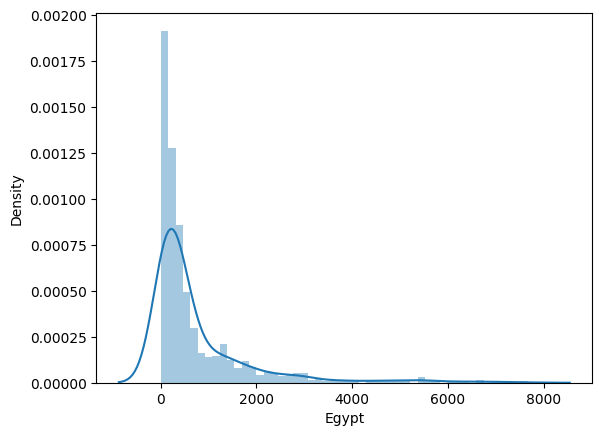

In [65]:
sns.distplot(x=arab_df[arab_df['location_name']=='Egypt']['val'].values.ravel(),axlabel='Egypt')

<ipython-input-66-1ac58920859e>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Bahrain', ylabel='Density'>

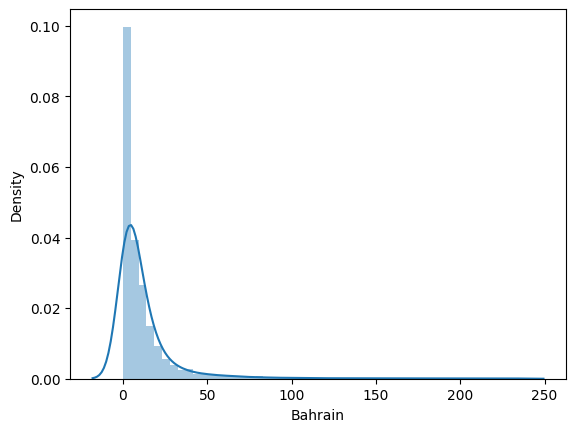

In [66]:
sns.distplot(x=arab_df[arab_df['location_name']=='Bahrain']['val'].values.ravel(),axlabel='Bahrain')

### Cancer Sites

In [67]:
stats=arab_df.groupby(['cause_name'])['val'].describe()
stats

count         mean          std  \
cause_name                                                                 
Bladder cancer                           600.0   372.904958   907.069978   
Brain and central nervous system cancer  600.0   155.014795   190.149418   
Breast cancer                            600.0  1042.674485  1338.872541   
Cervical cancer                          600.0   172.828336   214.716540   
Colon and rectum cancer                  600.0   345.473625   407.409055   
Esophageal cancer                        600.0    53.623052    59.772098   
Gallbladder and biliary tract cancer     600.0    34.731164    49.730295   
Hodgkin lymphoma                         600.0    48.470467    54.418534   
Kidney cancer                            600.0    90.719517   112.844774   
Larynx cancer                            600.0   100.799492   114.289850   
Leukemia                                 600.0   486.157802   525.748360   
Lip and oral cavity cancer               600.0    53.873631    55.243791   
Liver cancer                             600.0   148.211193   453.538071   
Malignant skin melanoma                  600.0    14.690903    14.202318   
Mesothelioma                             600.0     3.708398     4.836666   
Multiple myeloma                         600.0    51.884087    63.085070   
Nasopharynx cancer                       600.0    73.111664   127.982118   
Non-Hodgkin lymphoma                     600.0   150.927986   181.537118   
Non-melanoma skin cancer                 600.0     2.514937     3.042164   
Other malignant neoplasms                600.0   385.142811   480.690148   
Other neoplasms                          600.0    70.396965    84.955129   
Other pharynx cancer                     600.0    10.332255    12.727868   
Ovarian cancer                           600.0   105.411995   129.419674   
Pancreatic cancer                        600.0    58.713294    81.766730   
Prostate cancer                          600.0   325.102044   351.552912   
Stomach cancer                           600.0   149.042422   163.752491   
Testicular cancer                        600.0    31.935690    41.549170   
Thyroid cancer                           600.0   147.718702   201.015699   
Tracheal, bronchus, and lung cancer      600.0   231.528928   269.068153   
Uterine cancer                           600.0    77.289031   103.439221   

                                               min         25%         50%  \
cause_name                                                                   
Bladder cancer                            2.282366   36.613015  135.294182   
Brain and central nervous system cancer   3.104027   34.495387   78.050198   
Breast cancer                            19.780939  180.251255  486.108552   
Cervical cancer                           2.769359   24.803715   91.104975   
Colon and rectum cancer                   6.929239   85.181084  204.531951   
Esophageal cancer                         1.094338    7.233831   25.999481   
Gallbladder and biliary tract cancer      0.610936    5.498684   15.598991   
Hodgkin lymphoma                          0.605842    9.809216   29.681441   
Kidney cancer                             2.139697   21.288221   46.300709   
Larynx cancer                             2.585762   15.727751   52.508592   
Leukemia                                  8.065378  124.668839  251.007778   
Lip and oral cavity cancer                1.061699   13.808120   34.850487   
Liver cancer                              2.044468   17.495386   34.490780   
Malignant skin melanoma                   0.253093    4.073920   10.271051   
Mesothelioma                              0.052968    0.859674    2.214075   
Multiple myeloma                          0.844661   11.769391   30.059267   
Nasopharynx cancer                        0.517498    7.640803   22.517991   
Non-Hodgkin lymphoma                      3.555583   34.739255   76.631618   
Non-melanoma skin cancer                  0.0317

In [68]:
stats['std']/stats['mean']

cause_name
Bladder cancer                             2.432443
Brain and central nervous system cancer    1.226653
Breast cancer                              1.284075
Cervical cancer                            1.242369
Colon and rectum cancer                    1.179277
Esophageal cancer                          1.114672
Gallbladder and biliary tract cancer       1.431864
Hodgkin lymphoma                           1.122715
Kidney cancer                              1.243886
Larynx cancer                              1.133834
Leukemia                                   1.081436
Lip and oral cavity cancer                 1.025433
Liver cancer                               3.060080
Malignant skin melanoma                    0.966742
Mesothelioma                               1.304246
Multiple myeloma                           1.215885
Nasopharynx cancer                         1.750502
Non-Hodgkin lymphoma                       1.202806
Non-melanoma skin cancer                   1.209638
O

<ipython-input-69-83b246502296>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Non-melanoma skin cancer', ylabel='Density'>

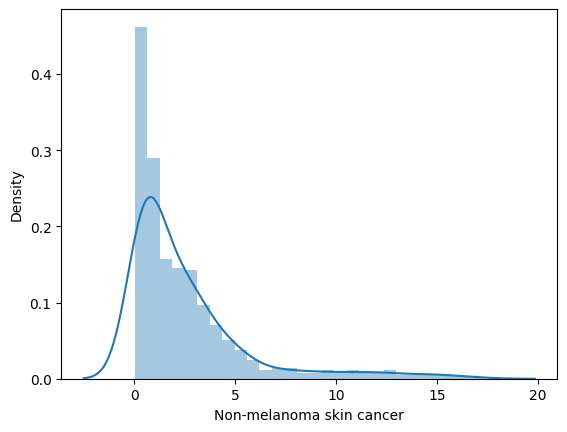

In [69]:
sns.distplot(x=arab_df[arab_df['cause_name']=='Non-melanoma skin cancer']['val'].values.ravel(),axlabel='Non-melanoma skin cancer')

In [70]:
normality_test('cause_name')

Statistics=0.697, p=0.000
Thyroid cancer does not look Gaussian (reject H0)
Statistics=0.654, p=0.000
Mesothelioma does not look Gaussian (reject H0)
Statistics=0.781, p=0.000
Hodgkin lymphoma does not look Gaussian (reject H0)
Statistics=0.734, p=0.000
Non-Hodgkin lymphoma does not look Gaussian (reject H0)
Statistics=0.714, p=0.000
Multiple myeloma does not look Gaussian (reject H0)
Statistics=0.785, p=0.000
Leukemia does not look Gaussian (reject H0)
Statistics=0.756, p=0.000
Other neoplasms does not look Gaussian (reject H0)
Statistics=0.691, p=0.000
Other malignant neoplasms does not look Gaussian (reject H0)
Statistics=0.800, p=0.000
Larynx cancer does not look Gaussian (reject H0)
Statistics=0.770, p=0.000
Tracheal, bronchus, and lung cancer does not look Gaussian (reject H0)
Statistics=0.720, p=0.000
Breast cancer does not look Gaussian (reject H0)
Statistics=0.747, p=0.000
Cervical cancer does not look Gaussian (reject H0)
Statistics=0.666, p=0.000
Uterine cancer does not look

<ipython-input-71-ad81fc930d6b>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Breast cancer', ylabel='Density'>

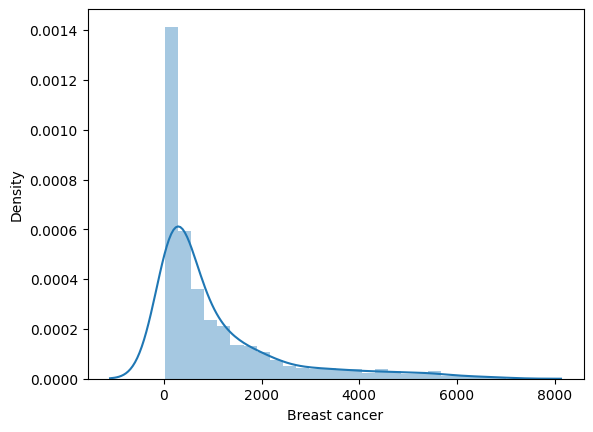

In [71]:
sns.distplot(x=arab_df[arab_df['cause_name']=='Breast cancer']['val'].values.ravel(),axlabel='Breast cancer')

# Data Visualizations

### Functions

In [72]:
g_arab_data_copy=g_arab_data.reset_index()
c_arab_data_copy =c_arab_data.reset_index()

In [73]:
def error_bars(var,flag):
  if flag==1:
    error_country=[]
    country=arab_df[arab_df['location_name']==var]
    for i in country.year.unique():
      error_country.append(sem(country[(country['year']==i)]['val']))
    return error_country
  else:
    error_site=[]
    site=arab_df[arab_df['cause_name']==var]
    for i in site.year.unique():
      error_site.append(sem(site[site['year']==i]['val']))
    return error_site

In [74]:
def calc(df,year):
  ycol=df.cause_name.unique()
  lst=[]
  if year==None:
    for i in ycol:
      num=df[(df['cause_name']==i)]['val'].mean()
      num_form="{:.2f}".format(num)  
      lst.append(num_form)
    return lst,ycol

  else:
    for i in ycol:
      num=df[(df['year']==year) & (df['cause_name']==i)]['val'].mean()
      num_form="{:.2f}".format(num)  
      lst.append(num_form)
    return lst,ycol

In [75]:
def view(df,view):
  if view=='cause_name':
    t='Accross All Cancer Sites'
    c='Cancer Site'
  else:
    t='in the Arab World'
    c='Country'

  fig = px.line( x=df['year'],y=df['val'],color=df[view],labels={'y':'Average Number of Years Lost to Disability (YLD)','x':'Year','color':f'{c}'},
              title=f"Average Number of Years Lost to Disability (YLD) {t} (1990-2019)  <br><sup>iCanViz Research and Development Project 2023 - GA4DH and PSUT - Prof.Mohammad Odeh, Dr.Serin Atiani, Reema Maen, Mahmoud Saber</sup>")
  fig.update_layout( plot_bgcolor='rgba(0, 0, 0, 0)', paper_bgcolor='rgba(0, 0, 0, 0)')
  fig.show()

In [76]:
def series(df1,option):
  if option=='location_name':
    flag=1
  else:
    flag=0
  for i in arab_df[option].unique():
    df= df1[df1[option]==i]
    er=error_bars(i,flag)
    fig = go.Figure([
    go.Scatter(
        name='YLD',
        x=df['year'],
        y=df['val'],
        mode='lines',
        line=dict(color='black'),
    ),
        go.Scatter(
        name='Upper Bound',
        x=df['year'],
        y=df['val']+er,
        mode='lines',
        marker=dict(color="#E7E7E7"),
        fill='tonexty'

    ),
        go.Scatter(
        name='Lower Bound',
        x=df['year'],
        y=df['val']-er,
        mode='lines',
        marker=dict(color="#E7E7E7"),
        fill='tonexty'

    ),
    ])
    fig.update_layout(
    yaxis_title='Average Number of Years Lost to Disability', xaxis_title='Years',
    title=f'Average Number of Years Lost to Disability (YLD) in {i} (1990-2019)', plot_bgcolor='rgba(0, 0, 0, 0)', paper_bgcolor='rgba(0, 0, 0, 0)',
    hovermode="x"
    )
    fig.show()

### Outcomes

In [77]:
fig = px.box(arab_df, x=arab_df['cause_name'], y=arab_df['val'],labels={'val':'Number of Years Lost to Disability','cause_name':'Cancer Sites'},height=500,
              title=f"Years Lost to Disability Accross All Cancer Sites (1990 - 2019)")
fig.update_layout(yaxis={'categoryorder': 'total ascending'},plot_bgcolor='rgba(0, 0, 0, 0)', paper_bgcolor='rgba(0, 0, 0, 0)')
fig.show()

In [78]:
view(c_arab_data_copy,'cause_name')

In [79]:
fig = px.box(arab_df, x=arab_df['location_name'], y=arab_df['val'],labels={'val':'Number of Years Lost to Disability','location_name':'Arab Countries'},height=500,
              title=f"Years Lost to Disability Accross All Arab Countries (1990- 2019)")
fig.update_layout(yaxis={'categoryorder': 'total ascending'},plot_bgcolor='rgba(0, 0, 0, 0)', paper_bgcolor='rgba(0, 0, 0, 0)')
fig.show()

In [80]:
view(g_arab_data_copy,'location_name')

In [81]:
series(c_arab_data_copy,'cause_name')

In [82]:
series(g_arab_data_copy,'location_name')

In [83]:
for i in arab_df.cause_name.unique():
  site=arab_df[arab_df['cause_name']==i]
  fig = px.box( x=site['location_name'], y=site['val'],labels={'y':'Number of Years Lost to Disability','x':'Arab Countries'},height=500,
              title=f"Number of Years Lost to Disability (YLD) for {i} accross all Arab Countries (1990- 2019)")
  fig.update_layout(yaxis={'categoryorder': 'total ascending'},plot_bgcolor='rgba(0, 0, 0, 0)', paper_bgcolor='rgba(0, 0, 0, 0)')
  fig.show()

In [84]:
for i in arab_df.location_name.unique():
  country=arab_df[arab_df['location_name']==i]
  fig = px.box( x=country['cause_name'], y=country['val'],labels={'y':'Number of Years Lost to Disability','x':'Cancer Sites'},height=500,
              title=f"Number of Years Lost to Disability (YLD) for {i} accross all Cancer Sites (1990- 2019)")
  fig.update_layout(yaxis={'categoryorder': 'total ascending'},plot_bgcolor='rgba(0, 0, 0, 0)', paper_bgcolor='rgba(0, 0, 0, 0)')
  fig.show()